In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


# Reading and displaying data

In [9]:
df = pd.read_csv('yassir_eta_sample.csv')
print("the number of rows is :",len(df))
print(df)

the number of rows is : 119659
        pickup_lat  pickup_lng  dropoff_lat  dropoff_lng   eta  hour  \
0         36.69359     3.08008     36.74878      2.95118  1531     0   
1         36.77913     3.24047     36.66214      3.05261  2133     0   
2         36.74482     2.95584     36.74566      2.94355   238     0   
3         36.70221     2.97031     36.69438      2.97311   278     0   
4         36.76901     3.03099     36.75186      2.99687   542     0   
...            ...         ...          ...          ...   ...   ...   
119654    36.69903     3.20222     36.78164      3.01257  1515    23   
119655    36.75759     3.04181     36.70601      3.22820  1348    23   
119656    36.74288     3.09469     36.75285      2.98006  1134    23   
119657    36.69680     3.07663     36.72063      3.18550  1192    23   
119658    36.70861     3.22350     36.76235      2.92259  2146    23   

       modified_date  
0       30T00:32:54Z  
1       09T00:16:06Z  
2       26T00:03:14Z  
3       29T0

In [41]:
df.head()

,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,eta,hour,modified_date
0,36.69359,3.08008,36.74878,2.95118,1531,0,30T00:32:54Z
1,36.77913,3.24047,36.66214,3.05261,2133,0,09T00:16:06Z
2,36.74482,2.95584,36.74566,2.94355,238,0,26T00:03:14Z
3,36.70221,2.97031,36.69438,2.97311,278,0,29T00:09:53Z
4,36.76901,3.03099,36.75186,2.99687,542,0,21T00:30:32Z


In [38]:
df1.dtypes.value_counts()

float64    6
object     1
dtype: int64

In [37]:
df.describe()

,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,eta,hour
count,119659.000000,119659.000000,119659.000000,119659.000000,119659.000000,119659.000000
mean,36.738973,3.051952,36.737389,3.055991,1110.326754,15.235452
std,0.032241,0.096554,0.032848,0.100225,557.258649,8.797389
min,36.588510,2.805770,36.591500,2.806980,1.000000,0.000000
25%,36.720310,2.992840,36.717290,2.994790,704.000000,5.000000
50%,36.741970,3.046240,36.741180,3.048860,1054.000000,20.000000
75%,36.760100,3.095140,36.759890,3.108130,1449.000000,22.000000
max,36.819060,3.380390,36.817960,3.380390,5238.000000,23.000000


In [35]:
df.dtypes

pickup_lat       float64
pickup_lng       float64
dropoff_lat      float64
dropoff_lng      float64
eta                int64
hour               int64
modified_date     object
dtype: object

In [10]:
# missing data

print('the percentage of missing values for each feature is:')
novalues = df.isnull().sum(axis = 0)*100/len(df)
print(novalues)

the percentage of missing values for each feature is:
pickup_lat       0.0
pickup_lng       0.0
dropoff_lat      0.0
dropoff_lng      0.0
eta              0.0
hour             0.0
modified_date    0.0
dtype: float64


In [40]:
print("the number of missing values in each variable is :\n " ,df.isna().sum())

the number of missing values in each variable is :
  pickup_lat       0
pickup_lng       0
dropoff_lat      0
dropoff_lng      0
eta              0
hour             0
modified_date    0
dtype: int64


# Normalizing data

In [15]:

## we make a new dataframe with only float variables (we take off the date)
df1 = df[['pickup_lat', 'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'eta', 'hour']]
## we normalize this new dataframe
x = df1.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#we store the normalized values in df1
df1 = pd.DataFrame(x_scaled)
## we add the date again to the data frame 
df1['modified_date'] = df["modified_date"]
## rename the column
df1 = df1.rename(columns={0 : "pickup_lat", 1 : "pickup_lng", 2 : "dropoff_lat", 3 : "dropoff_lng", 4 : "eta", 5 : "hour"})
#let's visualize our new normalized data
print(df1)


        pickup_lat  pickup_lng  dropoff_lat  dropoff_lng       eta  hour  \
0         0.455780    0.477376     0.694516     0.251478  0.292152   0.0   
1         0.826805    0.756500     0.311931     0.428367  0.407103   0.0   
2         0.677987    0.261164     0.680738     0.238172  0.045255   0.0   
3         0.493169    0.286346     0.454297     0.289723  0.052893   0.0   
4         0.782910    0.391946     0.708116     0.331159  0.103303   0.0   
...            ...         ...          ...          ...       ...   ...   
119654    0.479375    0.689934     0.839618     0.358539  0.289097   1.0   
119655    0.733377    0.410776     0.505652     0.734588  0.257208   1.0   
119656    0.669573    0.502802     0.712488     0.301843  0.216345   1.0   
119657    0.469703    0.471372     0.570211     0.660121  0.227420   1.0   
119658    0.520928    0.726967     0.754438     0.201618  0.409586   1.0   

       modified_date  
0       30T00:32:54Z  
1       09T00:16:06Z  
2       26T00:03:1

In [36]:
df1.head()

,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,eta,hour,modified_date
0,0.455780,0.477376,0.694516,0.251478,0.292152,0.0,30T00:32:54Z
1,0.826805,0.756500,0.311931,0.428367,0.407103,0.0,09T00:16:06Z
2,0.677987,0.261164,0.680738,0.238172,0.045255,0.0,26T00:03:14Z
3,0.493169,0.286346,0.454297,0.289723,0.052893,0.0,29T00:09:53Z
4,0.782910,0.391946,0.708116,0.331159,0.103303,0.0,21T00:30:32Z


# Correlation analysis and feature selection

In [39]:
df.corr()

,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,eta,hour
pickup_lat,1.000000,-0.168752,0.173195,-0.052440,-0.053931,0.007353
pickup_lng,-0.168752,1.000000,-0.054072,0.311147,0.031324,0.012846
dropoff_lat,0.173195,-0.054072,1.000000,-0.211451,-0.078016,-0.013388
dropoff_lng,-0.052440,0.311147,-0.211451,1.000000,0.044669,-0.016896
eta,-0.053931,0.031324,-0.078016,0.044669,1.000000,-0.012108
hour,0.007353,0.012846,-0.013388,-0.016896,-0.012108,1.000000


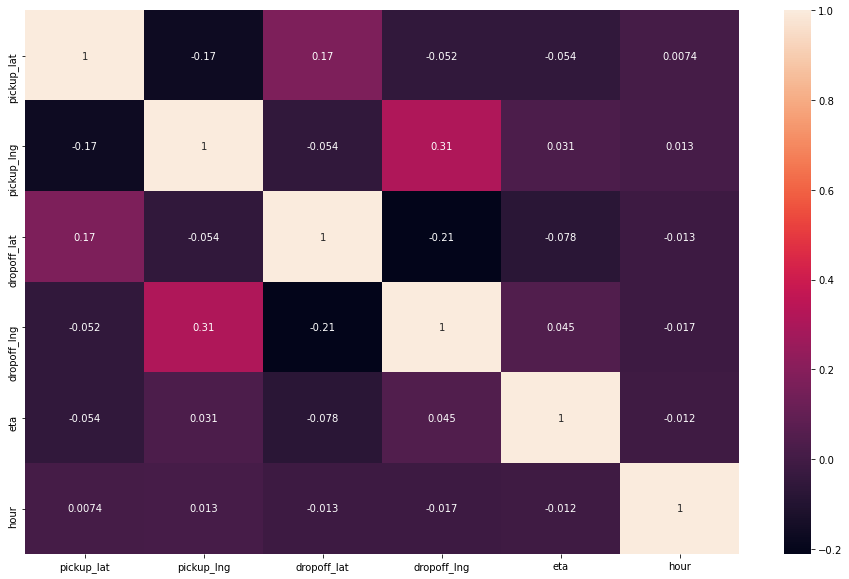

In [44]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True) 
plt.show() 

# Splitting the dataset into the Training ,Validation and Test set 

In [84]:
from sklearn.model_selection import train_test_split

trainset, testset= train_test_split(df,test_size=0.2, random_state=1)
#split trainset into train and validation set 
trainset_df, validset=train_test_split(trainset,test_size=0.2,random_state=1)
print('number of data point in train data:',trainset.shape[0]) 
print('number of data point in test data:',testset.shape[0]) 
print('number of data point in validation data:',validset.shape[0]) 

number of data point in train data: 95727
number of data point in test data: 23932
number of data point in validation data: 19146


The metric used in this problem is RMSE. For Baseline, we will predict the average fare amount and check the RMSE on validation data. Any model, should be able to beat this simple benchmark.

In [85]:
from sklearn.metrics import mean_squared_error

avg_fare=round(np.mean(trainset),2)
avg_fare.head()




pickup_lat       36.74
pickup_lng        3.05
dropoff_lat      36.74
dropoff_lng       3.06
eta            1110.83
dtype: float64